In [51]:
# Import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [37]:
#reading dataset 
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Shack Lab/Part 1: Predict the price of a house/DS - Assignment Part 1 data set.xlsx')


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [39]:
df.isnull().values.any()

False

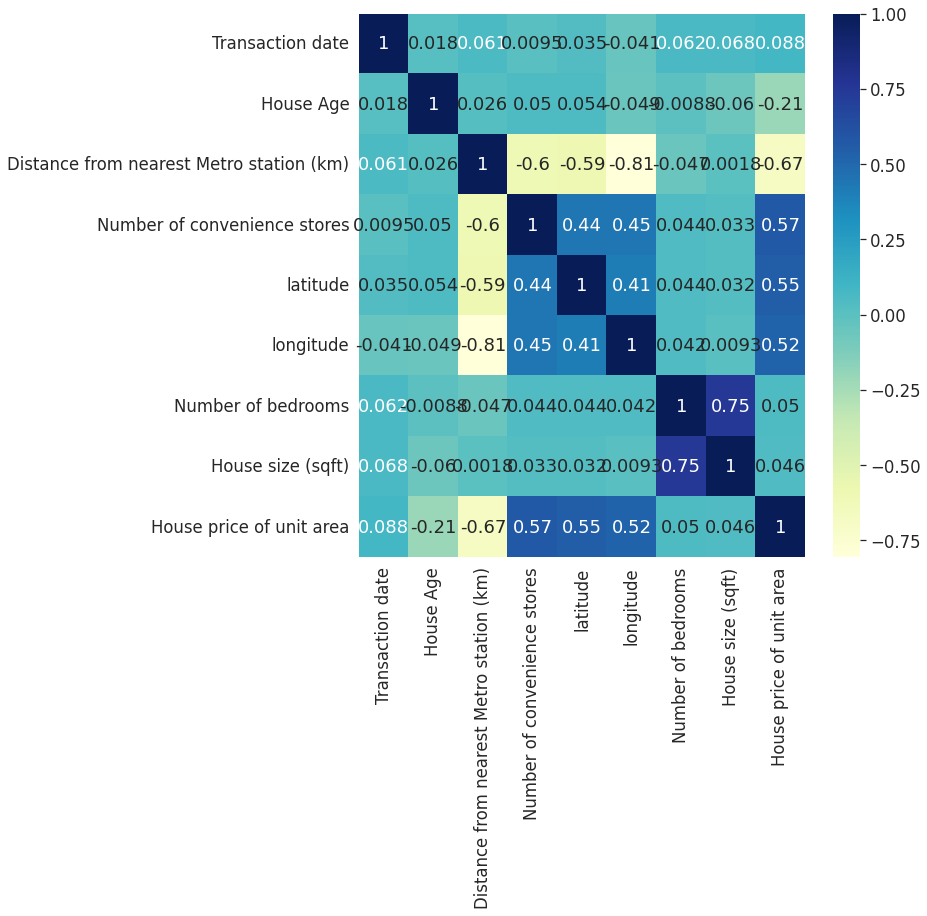

In [40]:
df_numeric = df.select_dtypes(exclude=['object'])
df_corr = df_numeric.corr()
plt.figure(figsize=(10,10))
#Heatmap:
sns.set(font_scale=1.5)
sns.heatmap(df_corr,cmap='YlGnBu', annot=True)

In [41]:
# droping Columns
df.drop(['House Age', 'Distance from nearest Metro station (km)'],axis=1,inplace=True)

In [42]:
df

,Transaction date,Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,10,24.98298,121.54024,1,575,37.9
1,2012.916667,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...
409,2013.000000,0,24.94155,121.50381,3,803,15.4
410,2012.666667,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,7,24.97923,121.53986,1,503,40.6
412,2013.000000,5,24.96674,121.54067,1,597,52.5


In [43]:
X = df.drop(columns='House price of unit area')
y = df['House price of unit area']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

 XGboost

In [45]:
XGBReg = xgb.XGBRegressor(n_estimators=100)
XGBReg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [54]:
XGBReg_pre = XGBReg.predict(X_test)
r2_score(y_test,XGBReg_pre)

0.416429734634015

Random Forest

In [48]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train,y_train)  

RandomForestRegressor(random_state=0)

In [49]:
regressor_pred = regressor.predict(X_test)
r2_score(y_test,regressor_pred)

0.4376603698585706

In [52]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
lr_pred = lr.predict(X_test)
r2_score(y_test,lr_pred)

0.46405212296471954